In [68]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from numpy import random as rand
#written by Reese Alexander on 3/26/24



In [69]:
#part 1 variables

alpha= 0 
theta = 0
beta = .015
sigU = .053
sigV = .044
rho = .98
RhoUV = -.8
sigmaUV = RhoUV*sigU*sigV

Time = [120,240,360,480,600,720,840,960,1080,1200]
repetitions = 250


In [70]:
def repeatme(length, sigmaU=sigU, sigmaV=sigV, simrho=rho, simsigmaUV=sigmaUV):
    xt = []
    rt = []
    x = 0
    xt.append(x)

    mean = [0,0]
    covariancemat = [[sigmaU**2,simsigmaUV],[simsigmaUV,sigmaV**2]]
    for i in range (length - 1):
        u,v = np.random.default_rng().multivariate_normal(mean, covariancemat).T
        r = 0 + beta*x + u
        x = 0 + rho*x + v
        xt.append(x)
        rt.append(r)
    xt.pop()
    return xt, rt

In [71]:
figs = []
for t in Time:
    betalist = []
    for rep in range(repetitions):
        thisrep = repeatme(t)
        a = np.array(thisrep[0]).reshape(-1,1)
        b = np.array(thisrep[1])
        model = LinearRegression(fit_intercept=True).fit(a,b)
        estbeta = model.coef_[0]
        betalist.append(estbeta)
    print(len(betalist))
    print(betalist)
    betalist = np.array(betalist)
    average = np.mean(betalist)
    perc5 = np.percentile(betalist,5)
    perc95 = np.percentile(betalist,95)
    figs.append([t,average,perc5,perc95])


print(figs)

    
    


250
[0.08688569427676729, 0.08255877667558573, 0.0017810130694899259, 0.12034539971389914, 0.017607011958438164, 0.08476795036962485, 0.011584508415401805, 0.005086591646942782, 0.05330189421148373, 0.01608612834845833, 0.022012134464401284, 0.04221155229808734, 0.05502000287401919, 0.06561814242768181, 0.042363590892440024, 0.09259290354107717, 0.05837144457872264, 0.08940085135040177, 0.02759997452219565, 0.059702820307690745, 0.13431432405418803, 0.09626309761841033, 0.08036883051387297, 0.1032087597051736, 0.05667375615068126, 0.045982953230222466, 0.018628979447712038, 0.02196608745747795, 0.09365332373740129, 0.03633752354001752, 0.035626715216429045, 0.0365255867287622, 0.12664411261972874, 0.11586899887695667, 0.21955150338071144, 0.025762912974918898, 0.0435557073647806, 0.04472836905908995, 0.0407115954540089, 0.1116634741416816, 0.09139189625682653, 0.029538239753715768, 0.11017188699561012, 0.0232979854174537, -0.005711648192939704, 0.08886159623995092, 0.17331652646708334,

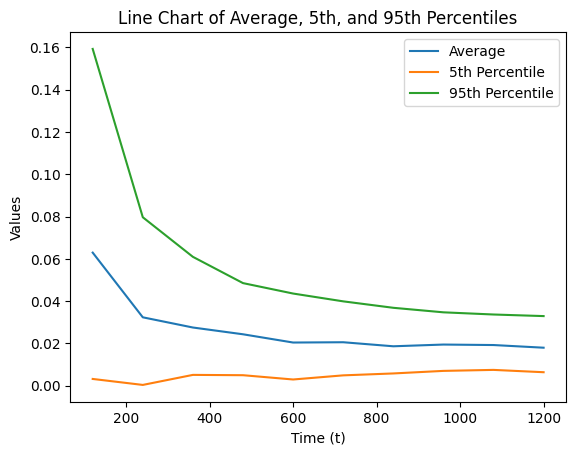

In [72]:
data = figs

# Extracting data for plotting
t_values = [item[0] for item in data]
ave_values = [item[1] for item in data]
percentile_5th_values = [item[2] for item in data]
percentile_95th_values = [item[3] for item in data]

# Plotting
plt.plot(t_values, ave_values, label='Average')
plt.plot(t_values, percentile_5th_values, label='5th Percentile')
plt.plot(t_values, percentile_95th_values, label='95th Percentile')

# Adding labels and legend
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.title('Line Chart of Average, 5th, and 95th Percentiles')
plt.legend()

# Display the plot
plt.show()

In [73]:
#part 2 variables
rhovals = [-.2,-.5,-.8]
alpha= 0 
theta = 0
beta = .015
sigU = .053
sigV = .044
rho = .98

Time = [120,240,360,480,600,720,840,960,1080,1200]
repetitions = 250
rhofigs = []
for yeet in rhovals:
    yeesigmaUV = yeet*sigU*sigV
    for t in Time:
        betalist = []
        for rep in range(repetitions):
            thisrep = repeatme(t,simsigmaUV=yeesigmaUV)
            a = np.array(thisrep[0]).reshape(-1,1)
            b = np.array(thisrep[1])
            model = LinearRegression(fit_intercept=True).fit(a,b)
            estbeta = model.coef_[0]
            betalist.append(estbeta)
        betalist = np.array(betalist)
        average = np.mean(betalist)
        perc5 = np.percentile(betalist,5)
        perc95 = np.percentile(betalist,95)
        rhofigs.append([t,average,perc5,perc95,yeet])





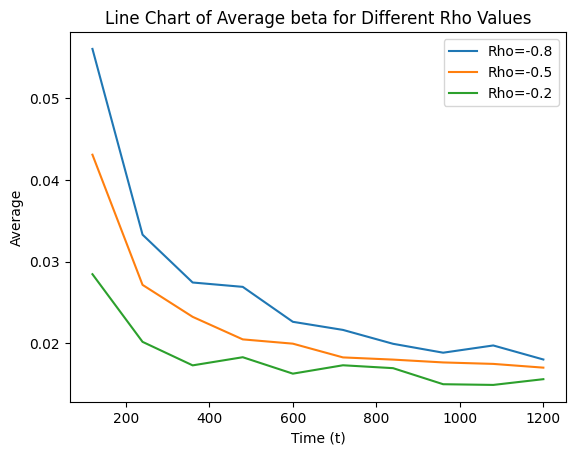

In [78]:

data = rhofigs# Extracting data for plotting
t_values = [item[0] for item in data]
yeet_values = sorted(set([item[4] for item in data]))

# Plotting
for yeet in yeet_values:
    ave_values = [item[1] for item in data if item[4] == yeet]
    plt.plot(t_values[:len(ave_values)], ave_values, label=f'Rho={yeet}')

# Adding labels and legend
plt.xlabel('Time (t)')
plt.ylabel('Average')
plt.title('Line Chart of Average beta for Different Rho Values')
plt.legend()

# Display the plot
plt.show()


